In [3]:
from IPython.display import Image
import pandas as pd

# Analyzing and predicting trends in natural disasters across the world 

## Introduction

This jupyter notebook serves as our holistic analysis into trends in natural disasters across the world. In this notebook, we will go over some exploratory data analysis, exploring how factors such as the frequency of disasters and the severity of disasters evolve over time, in addition to other trends present in natural disasters. Later in the analysis, we will be constructing a Multiple Linear Regression model to help us find out the effects of the different factors involving a natural disaster on the days to recover, in addition to helping us predict how many days a country takes to recover given the magnitude of these factors.

During this project, we'd hoped to answer some of these research questions: 
- How do different factors relevant to natural disasters evolve over time?

- Which disaster types result in the most casualties and economic loss?

- Is there a way to reliably predict the number of days it takes a country to recover following a natural disaster?

We attempt to answer these questions through conducting some EDA and building models, and in this notebook we will go over our process and findings.

## Data

Below is a sample of the data and the 12 columns present:

In [4]:
data = pd.read_csv('data/global_disaster_response_2018_2024 (1).csv')
data.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


## Exploratory Data Analysis

### Number of disasters over time

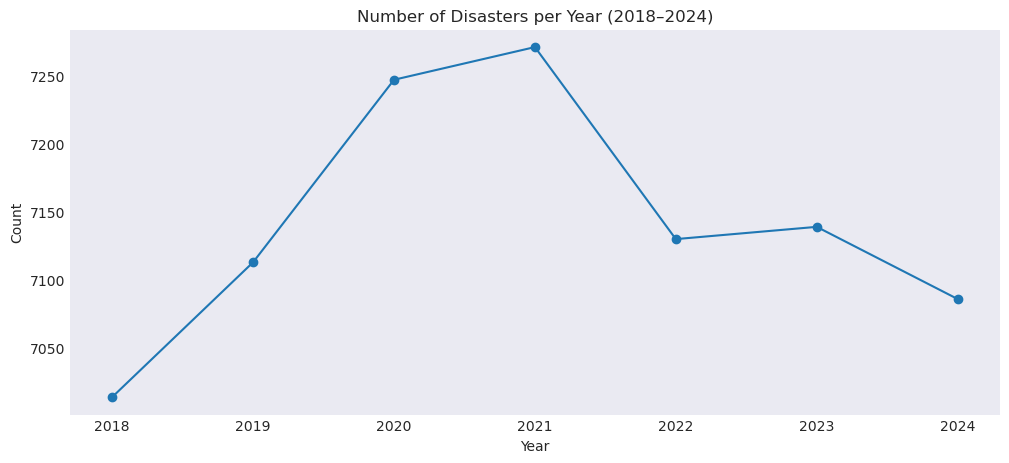

In [2]:
Image(filename="figures/disasters_per_year.png")

This line plot depicts the annual number of disasters from 2018 to 2024 in this line plot. There is a steady increase in the number of natural disasters since 2018, peaking in 2021. The number of natural disasters then declined and the count remained relatively stable compared to the prior increase. There is no traceable pattern that suggests the frequency of natural disaster have increased or decreased, and the line plot examining natural disaster frequency is only an overview to provide context for subsequent analysis.

### Average severity of disasters over time

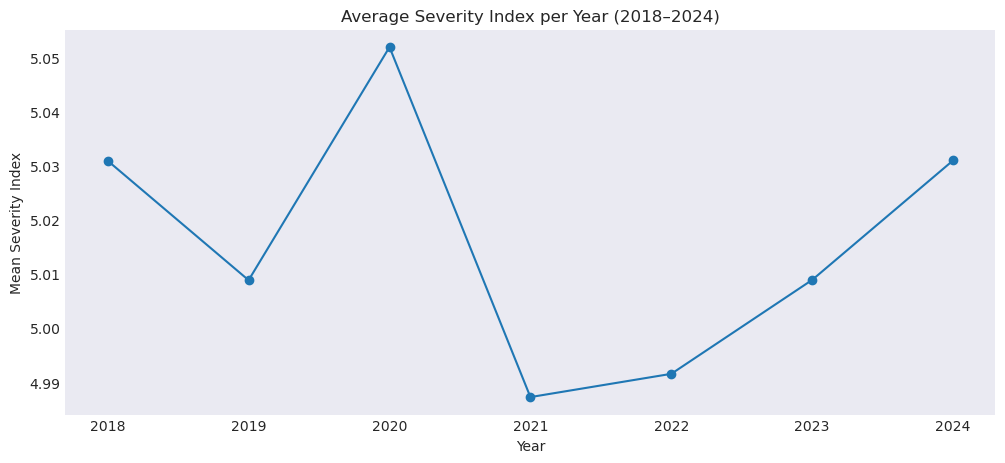

In [3]:
Image(filename="figures/severity_per_year.png")

This line plot examines the average severity index of natural disasters over the span of 2018 to 2024. The plot does not suggest a clear increasing or decreasing trend in average disaster severity over the period examined. In contrast to the variation we observed in disaster frequency, the average severity remained relatively stable over time with small fluctuations; notably slightly higher severity in 2020 and slightly lower in 2021. Just like disaster frequency, this plot primarily serves to establish context for later analysis.

### Average economic loss by disaster type

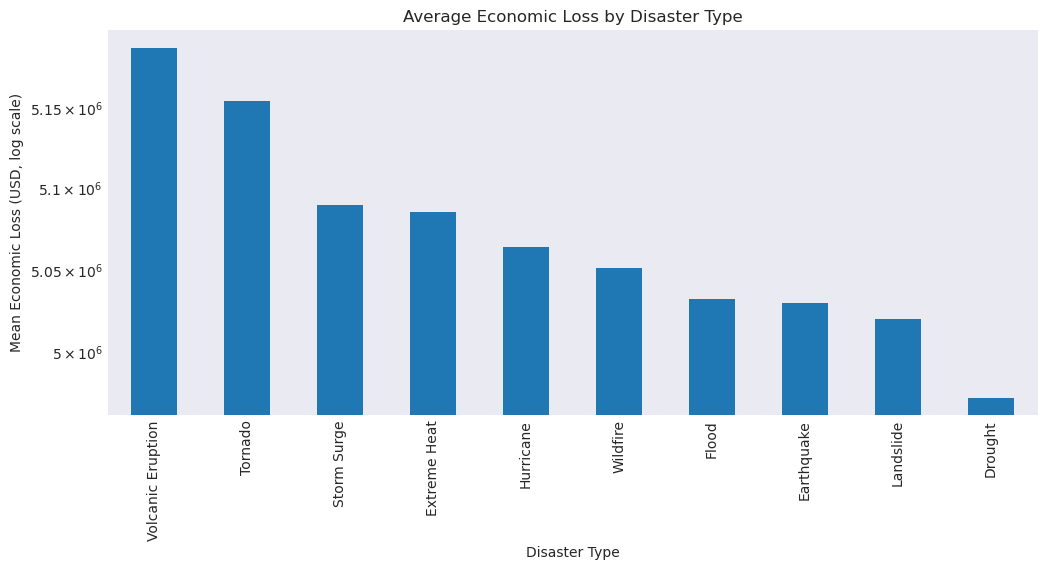

In [4]:
Image(filename="figures/avg_economic_loss_by_disaster_type.png")

This bar graph compares the average economic loss across different types of disasters. Due to the magnitude and nature of the variable, we decided to use log scale to capture the relative difference between different disaster types. It can be observed that volcanic eruptions and tornados are associated with higher economic loss on average while droughts and landslides tend to do less. Since magnitude of certain disasters can vary greatly, the averages are influenced by rare but extremely costly events, the figures only reflect the relative expected damage rather than typical outcomes.

### Average casualties by disaster type

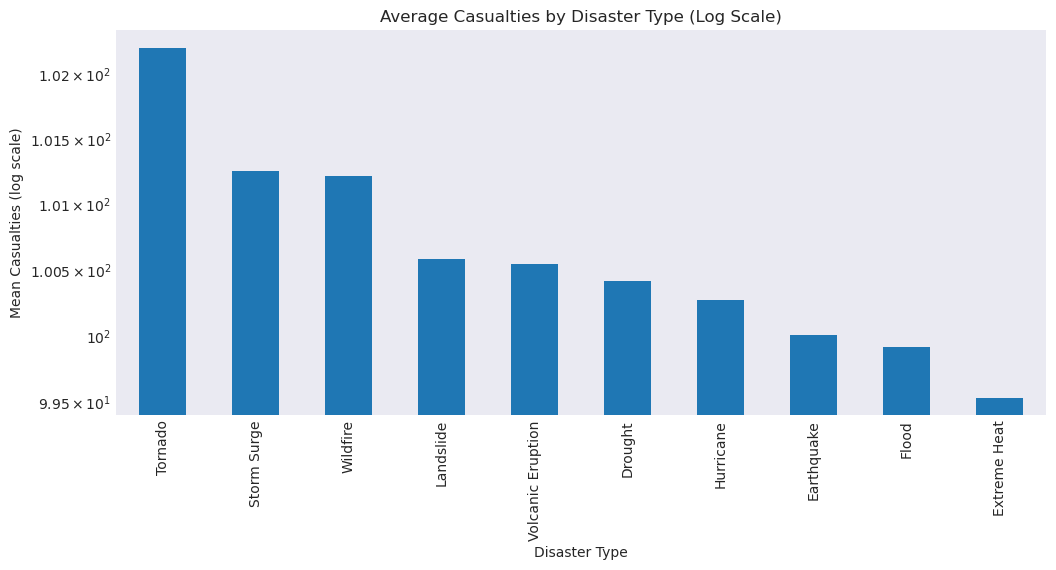

In [5]:
Image(filename="figures/avg_casualties_by_disaster_type.png")

This figure compares the average number of casualties per disaster event across disaster types. Compared to economic loss, average casualty counts are of similar magnitude across most disaster categories, with only modest variation. We present casualties on a logarithmic scale to facilitate comparison of proportional differences between disaster types. On average, disaster types such as tornadoes, storm surges, and wildfires are associated with slightly higher casualty counts per event, while categories such as extreme heat and floods exhibit lower average casualties. As with economic loss, these averages are influenced by rare but high-impact events, and therefore reflect relative expected per-event impact rather than typical outcomes.

### Average response time by disaster type

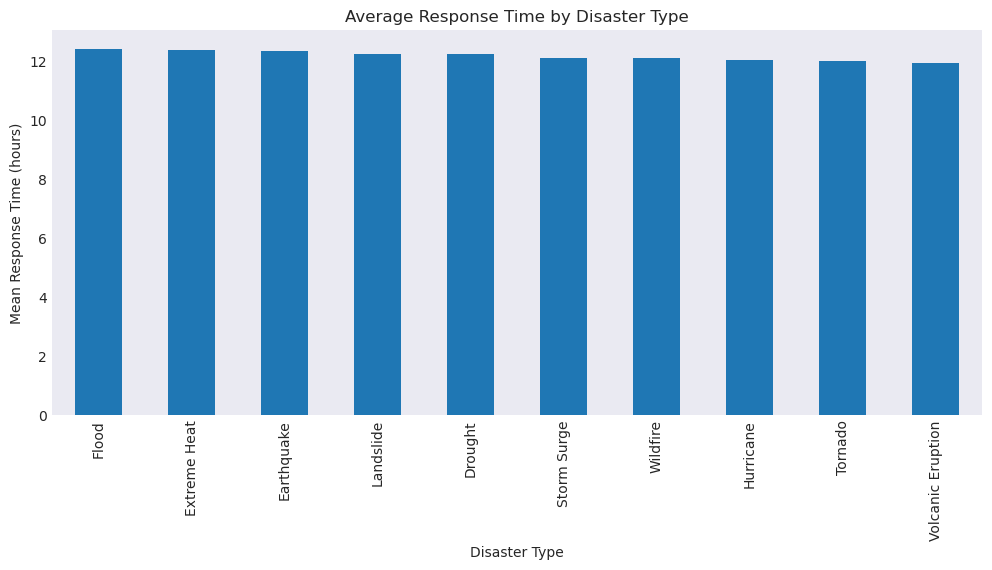

In [6]:
Image(filename="figures/avg_response_time_by_disaster_type.png")

This figure compares the average response time per disaster event across disaster types. Average response times are highly consistent across categories, with mean response durations clustering within a narrow range of hours. No disaster type exhibits markedly faster or slower response on average, indicating limited variation in this operational metric. Unlike economic loss or casualties, response time reflects human-driven emergency response processes that are shaped by standardized procedures, protocols, and logistical constraints. As a result, response times are presented on their original scale, where absolute differences are more meaningful than proportional ones. The observed consistency suggests that response time in the dataset is governed more by institutional response systems than by the specific characteristics of individual disaster types.

### Average recovery days by disaster type

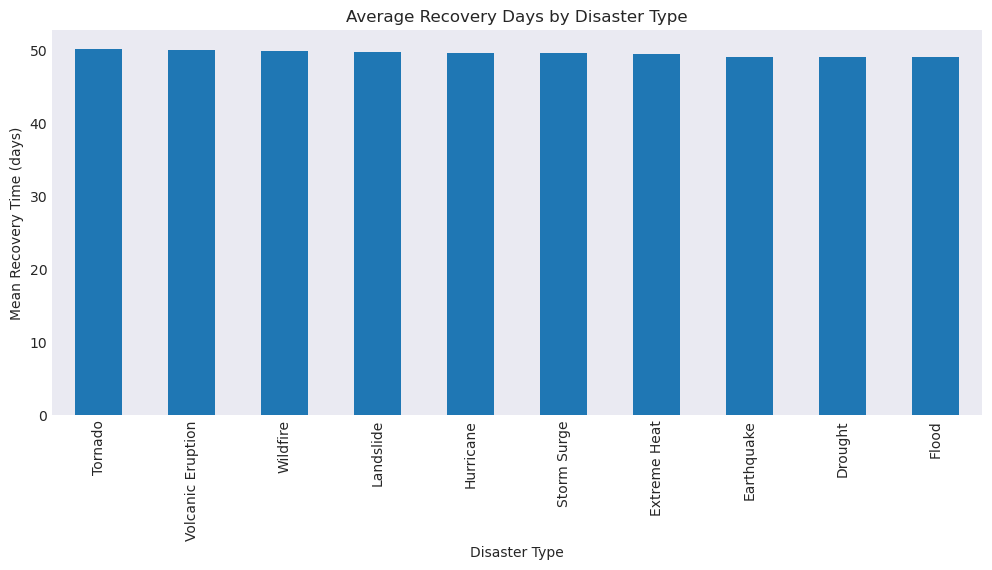

In [7]:
Image(filename="figures/avg_recovery_days_by_disaster_type.png")

This figure presents the average recovery time, measured in days, across disaster types. Similar to response time, recovery durations exhibit very limited variation, with mean recovery times clustering tightly around approximately 50 days regardless of disaster category. Recovery time reflects extended, human-driven processes such as infrastructure repair, resource allocation, and institutional coordination. These processes are often guided by standardized recovery frameworks and reporting practices, which can constrain variation across disaster types. As a result, recovery time is shown on its original scale, where absolute differences in days are most interpretable. The lack of strong variation suggests that, within this dataset, recovery duration is influenced more by systemic recovery mechanisms and data aggregation practices than by the specific physical characteristics of individual disaster types.

## Multiple Linear Regression: Predicting Recovery Days

#### Motivation for predicting recovery days 

Being able to accurately predict the number of days to recover following a natural disaster can be crucial to making decisions around allocating the right amount of funding and external help a country might need to rebuild. 

### What features are a good fit in our Multiple Linear Regression model?


To understand whether each feature is an appropriate choice in modelling the number of days a country takes to recover after an earthquake, it'd generally be a good idea to first inspect the correlations between the different possible covariates and the response variable: recovery days. Below is a plot of the correlation heatmap between some covariates and recovery days.

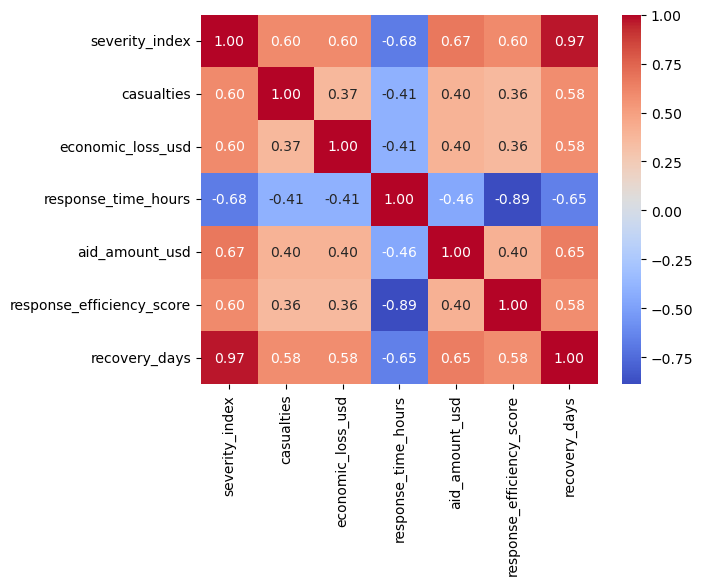

In [3]:
Image(filename='figures/correlation_heatmap.png')

Based on the correlation heatmap above, it could be reasonable to say that all of our features look to be appropriate as possible covariates to model recovery days. We can however, also see the presence of multicollinearity amongst some features, for example, response_efficiency_score and response_time_hours to be pretty negatively correlated. Despite this, I've ultimately decided to incoorporate all of the features here, because as of right now, I'm not too worried about this model overfitting to data, as we'll see later. We can also observe that severity_index looks to be highly correlated with recovery days at r = 0.97, so Im assuming this is probably going to have quite a lot of weight in our model.

Similar to the correlation heatmap, another good idea in deciding which models to include is to visually look at each covariates relation with recovery days. This is done below through the comparison of multiple scatterplots:

(Note : Im taking a random representative sample of 5000 rows when plotting these plots to avoid overplotting)

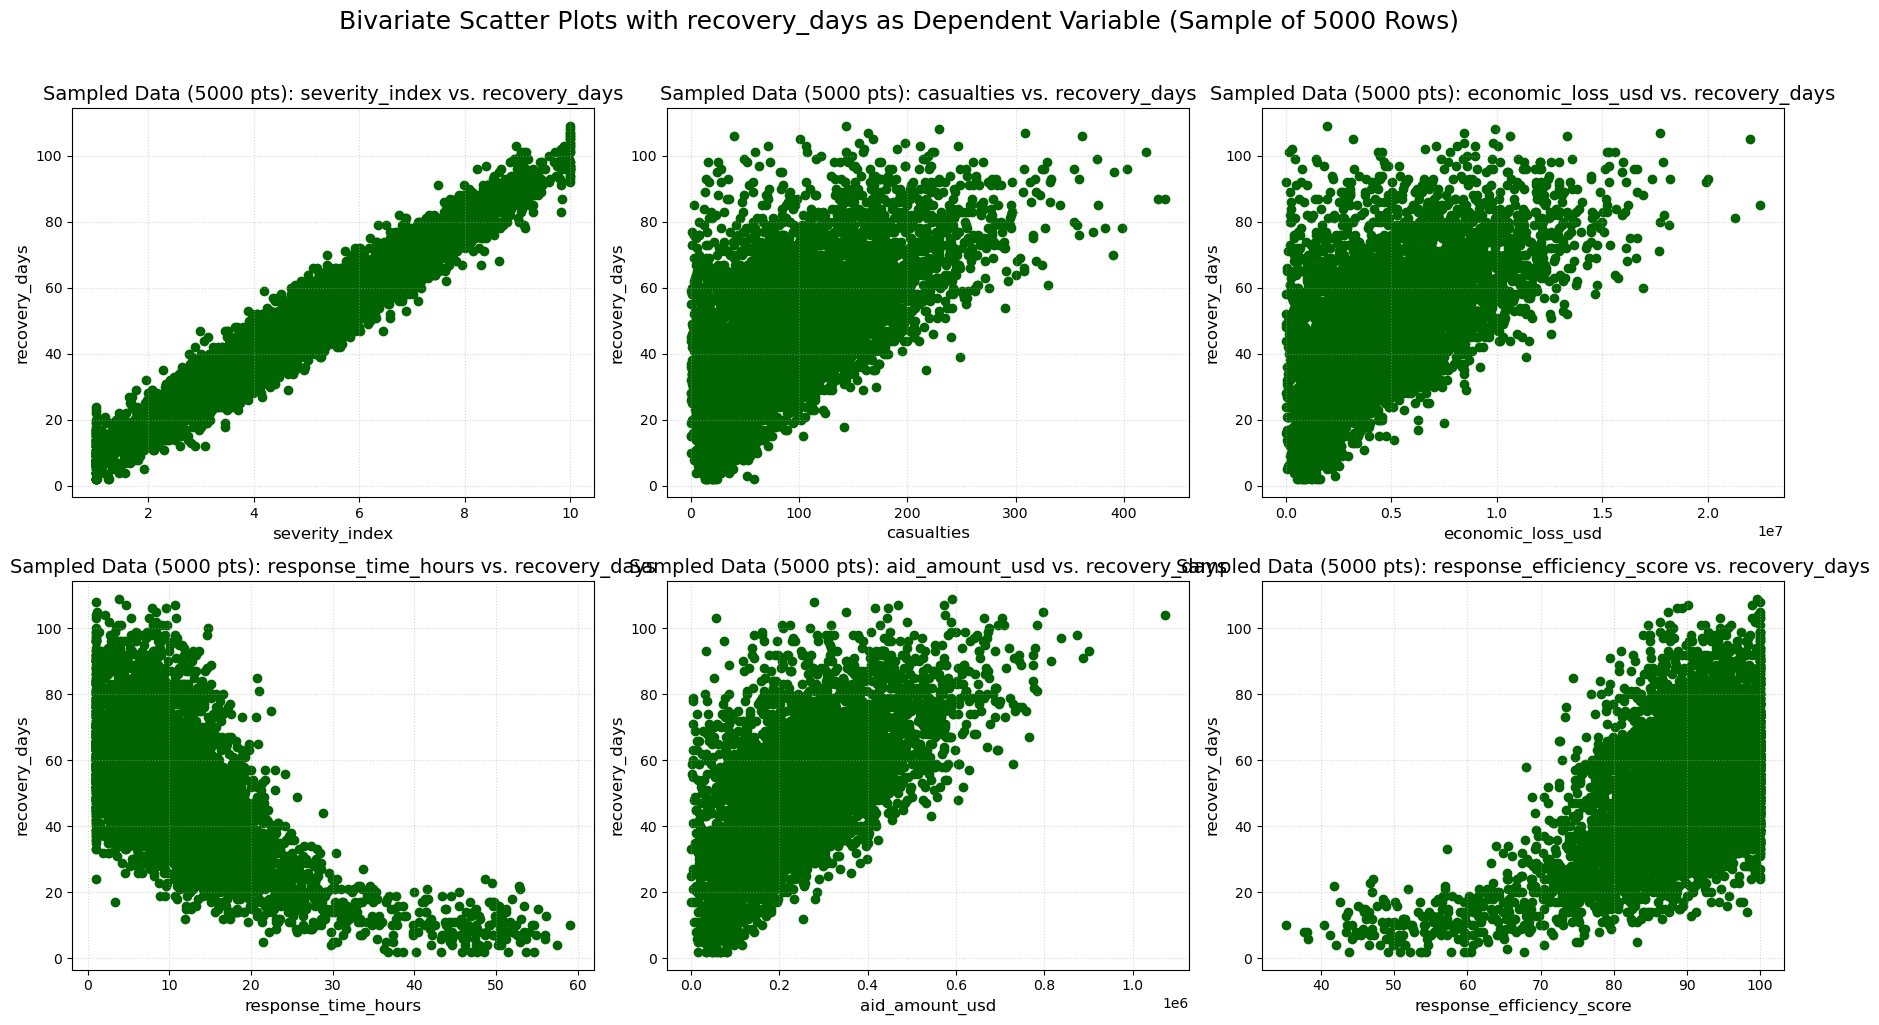

In [6]:
Image(filename='figures/Bivariate_relationships.png')

Here, we can immediately see a strong linear relationship between the severity index and recovery_days, so I'm confident this should be a pretty solid feature to include in our model. As for the other features, they don't exactly look linear, but with some transformations of the covariates, we can make them linear with recovery_days. 

### Feature Engineering

Below, I've taken the log of all the covariates other than the severity index.Notice that I've also essentially inversed the meaning of the 'response_efficiency_score'. I thought it'd make more intuitive sense for the recovery days to decrease as the score increased, which is what we observe below. This serves as the first step of our feature engineering procedure.

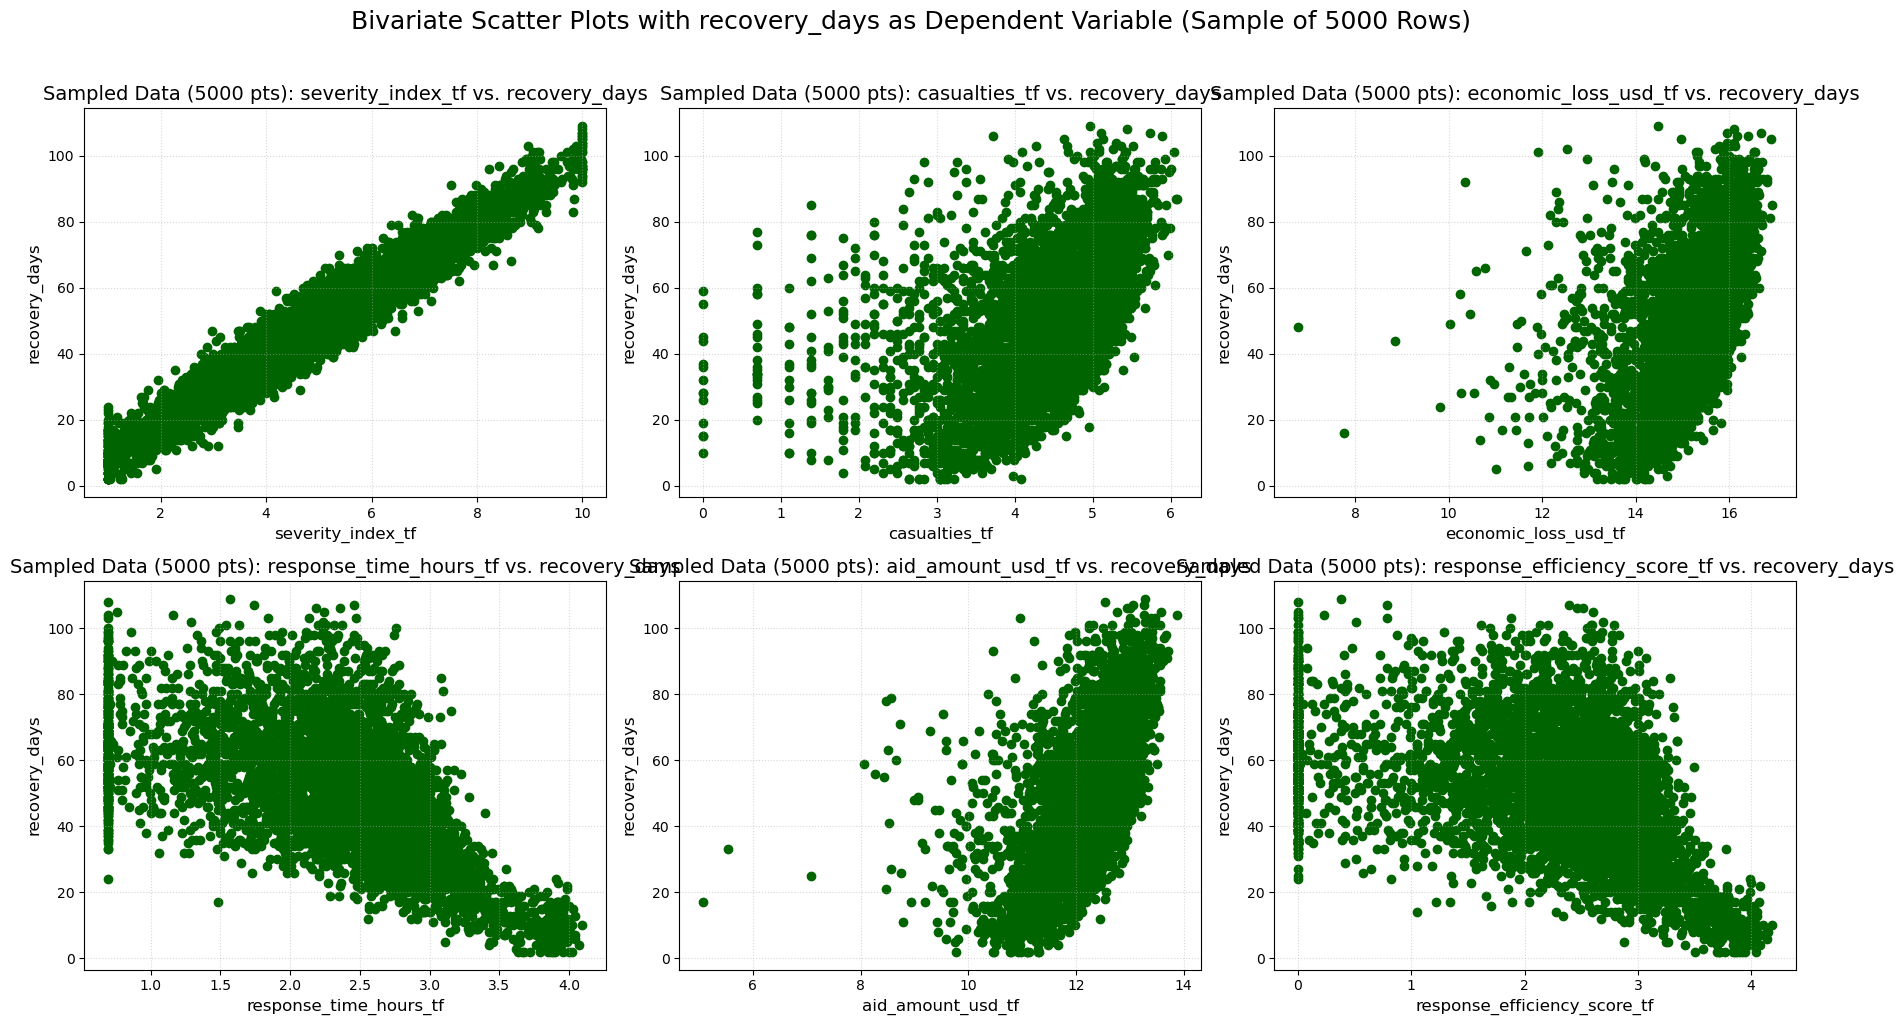

In [8]:
Image(filename='figures/Bivariate_tranformed_relationships.png')

Looking at the relationships between the transformed covariates and recovery days,we can observe more of a linear relationship between the covariates and the the response which is exactly what we wanted. Perhaps as a consequence of the transformations however, we can see the prevalence of some outliers, mostly clustered around 0 in these plots. What I'm going to do now is to get filter out any data that is less than or above 1.5 * the IQR of the data, this should effectively get rid of most of the outliers that may influence our final model.

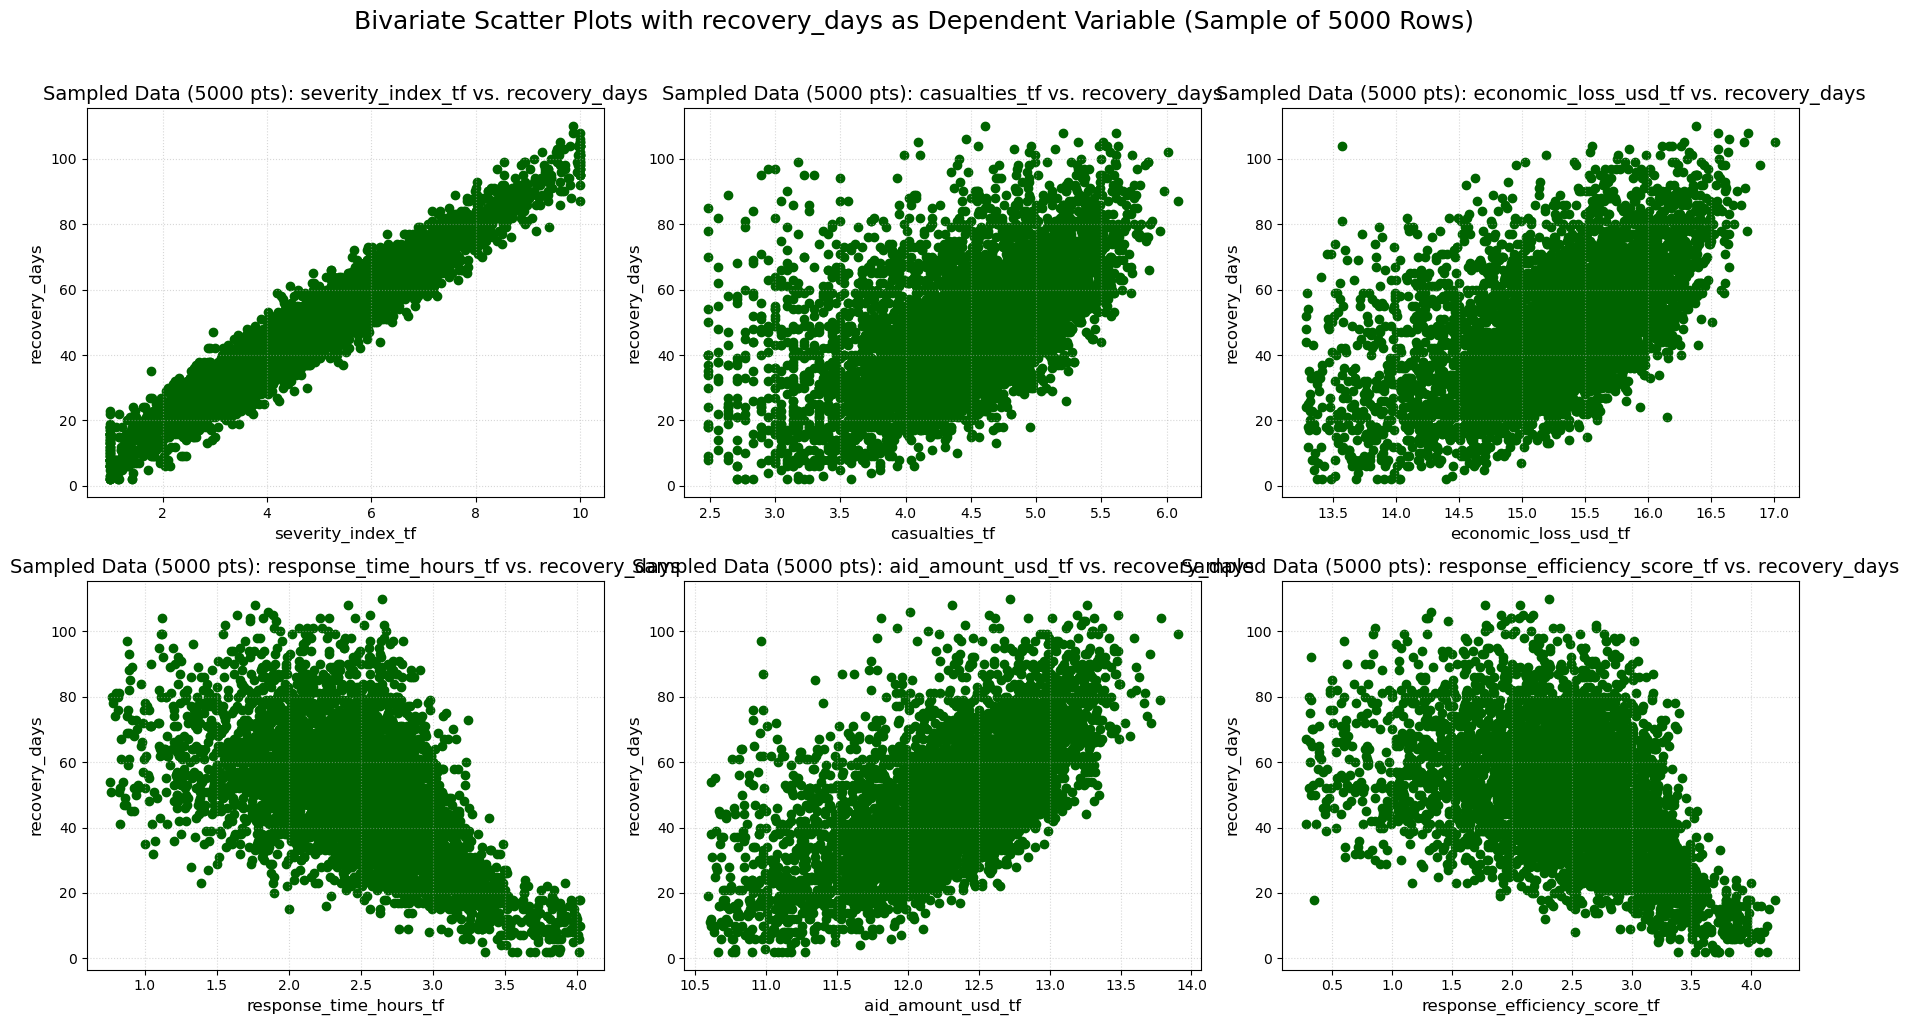

In [9]:
Image(filename='figures/Bivariate_relationships_wo_outliers.png')

Looking at the plots above, we've appeared to have succesffuly filtered out most of the outliers! Now we can proceed to actually fitting our model.

### Training the model

We are going to essentially apply the exact same steps we've described when plotting the plots above. We first split our original data into a randomly assigned training (80% of data) and testing (20% of data) split. We then take the logs of all the covariates other than severity_index, and we filter out any outliers according to the +- 1,5 * IQR rule established above. The resulting data serves as our design matrix to fit our model with.

Once fit, we get the following R^2 value and error metrics (Mean Square Error, Mean Absolute Error) when predicting the test:

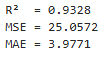

In [10]:
Image(filename='figures/MLR metrics.png')

This indicates that our covariates/model seem to be doing a good job in explaining the variance shown by the response, recovery days.

Other ways to get an idea of the performance of our model is to look at the residuals vs predicted values, in addition to the predicted vs actual values.

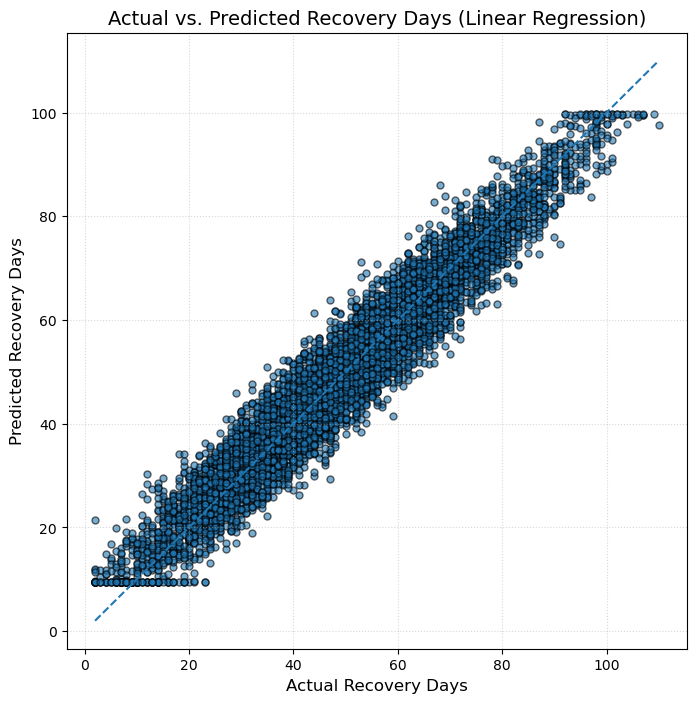

In [11]:
Image(filename='figures/actual_v_predicted.png')

We see here that the plot looks to follow the Y = X line, hence our model does a pretty good job at generalizing to the data. We can also observe that there seems to be a cutoff at around y = 10 and y = 100, and this is most likely due to filtering out the outliers in our preprocessing step.

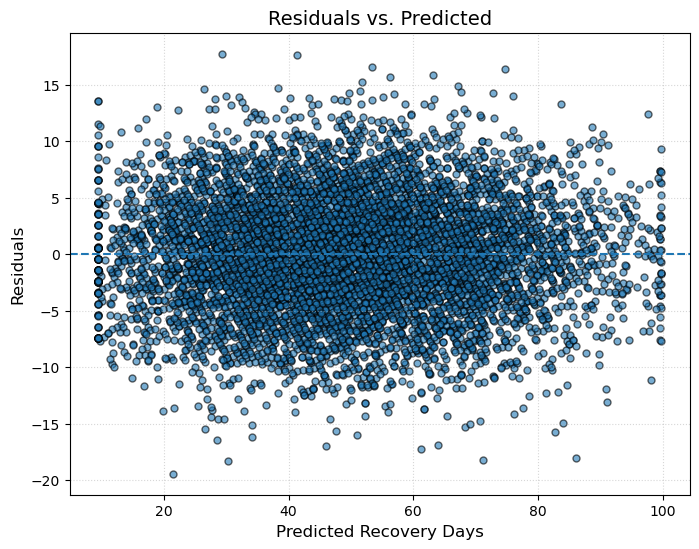

In [13]:
Image(filename='figures/residuals_v_predicted.png')

We see here that the plot looks to be randomly scattered around y = 0, which synonymously with the plot above, indicates that our models does a good job at generalizing to the data. Also similarly to the previous plot, there seems to be cutoffs around x = 0 and x= 100, which is due to us filtering out the outliers. Hence, to conclude the use of Multiple Linear Regression looks to be more than appropriate at modelling the recovery days based on the covariates we've studied so far! 

## Contribution

## Conclusion

In this notebook, we've consolidated our findings in attempting to answer our outlined research questions. Through some EDA, we've found that the average severity over time seems to vary quite a lot, and that there no real rhyme or reason to how severity changes over time. We've also observed that the most severe disaster in terms of casualties were tornadoes, while the most severe disaster in terms of economic loss was in fact Volcanic Eruption. Most surprisingly during our EDA, we observed that the number of days to recover seem uniformly distributed around 50 days for all types of disasters. 

During model construction, we observed the different relationships between the covariates and recovery days, and saw that after some transformations, they all seemed to have somewhat of a linear relationship with our response. In the end after some feature engineering, we were able to construct a Multiple Linear Regression model that did a considerably 